# HW:嘗試了解91APP資料

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# 資料讀取

In [2]:
Orders = pd.read_csv('datasets/Orders.csv', low_memory=False)

# 資料概況

In [3]:
Orders.head(3).T

,0,1,2
DateId,20150703,20150703,20150703
MemberId,1388133,1388133,1388133
OrderGroupCode,b'\xd0_\x8eby\xe8\x88\xa5\x85\xe4\x15\nMC\xeaO...,b'\xd0_\x8eby\xe8\x88\xa5\x85\xe4\x15\nMC\xeaO...,b'\xd0_\x8eby\xe8\x88\xa5\x85\xe4\x15\nMC\xeaO...
TrackSourceTypeDef,Web,Web,Web
TrackDeviceTypeDef,Mobile,Mobile,Mobile
PayProfileTypeDef,SevenEleven,SevenEleven,SevenEleven
SalesOrderSlaveId,4457777,4457778,4457779
SalePageId,1242871,1242880,1242880
IsMajor,True,True,True
IsGift,False,False,False


# 資料樣貌
共有5495276筆資料及28個變數

In [4]:
Orders.shape

(5495276, 28)

# 資料型態

In [5]:
Orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5495276 entries, 0 to 5495275
Data columns (total 28 columns):
DateId                         int64
MemberId                       int64
OrderGroupCode                 object
TrackSourceTypeDef             object
TrackDeviceTypeDef             object
PayProfileTypeDef              object
SalesOrderSlaveId              int64
SalePageId                     int64
IsMajor                        bool
IsGift                         bool
IsSalePageGift                 bool
Quantity                       int64
UnitPrice                      float64
PromotionDiscount              float64
ECouponId                      int64
ECouponDiscount                float64
SalesOrderSlaveTotalPayment    float64
SalesOrderSlaveDateTime        object
SalesOrderReceiverId           int64
City                           object
District                       object
ZipCode                        float64
StoreName                      object
StoreId              

# 各項變數概況

# DateId訂單日期
明顯可以發現11月銷量特別好

In [6]:
Orders.DateId = pd.to_datetime(Orders.DateId.astype(str), format='%Y%m%d')

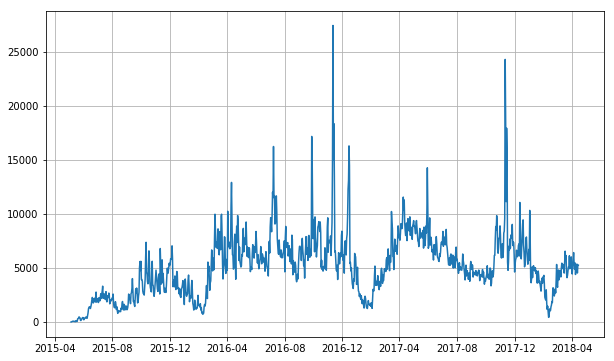

In [7]:
%matplotlib inline
plt.figure(figsize=(10,6))
plt.plot(Orders.groupby(by='DateId')['Quantity'].sum())
plt.grid(True) 
plt.show()

# TrackSourceTypeDef訂單來源
共三種訂單來源，以網頁最多，其次為ios及android app，兩者的數量差不多

In [8]:
Orders.groupby("TrackSourceTypeDef").size()

TrackSourceTypeDef
AndroidApp    1164055
Web           3170094
iOSApp        1161127
dtype: int64

# TrackDeviceTypeDef訂單裝置來源
共三種裝置來源，以行動裝置最多，電腦次之，平板最少

In [9]:
Orders.groupby("TrackDeviceTypeDef").size()

TrackDeviceTypeDef
Mobile    4629625
PC         865384
Pad           267
dtype: int64

# PayProfileTypeDef付款方式
共五種付款方式，以7-11居多Linepay最少

In [10]:
Orders.groupby("PayProfileTypeDef").size()

PayProfileTypeDef
ATM                  9133
CreditCardOnce     484949
Family            2037871
LinePay              4188
SevenEleven       2959135
dtype: int64

# IsMajor是否為主件/ IsGift是否為贈品
大部分為主件，少部分為贈品

In [11]:
Orders.groupby("IsMajor").size()

IsMajor
False     134197
True     5361079
dtype: int64

In [12]:
Orders.groupby("IsGift").size()

IsGift
False    5361079
True      134197
dtype: int64

# Quantity購買數量
絕大部分為1件，其次為2件，5件以上的較少

In [13]:
Orders.groupby("Quantity").size()

Quantity
1     5401056
2       83472
3        6586
4        2405
5         813
6         363
7         120
8         106
9          30
10        325
dtype: int64

# UnitPrice商品單價
商品單價最低為0元，最高為3500元，平均為263元

In [14]:
Orders.UnitPrice.describe().round(decimals=2)

count    5495276.00
mean         263.04
std          124.74
min            0.00
25%          199.00
50%          237.00
75%          320.00
max         3500.00
Name: UnitPrice, dtype: float64

# PromotionDiscount折扣金額 / ECouponDiscount折價券折抵金額
有45%的訂單有折扣，平均折扣為54元，有30%的訂單使用折價卷，平均折抵23元，較折扣金額少。

In [15]:
PD = Orders[Orders["PromotionDiscount"]<0].PromotionDiscount.describe().round(decimals=2)
ED = Orders[Orders["ECouponDiscount"]<0].ECouponDiscount.describe().round(decimals=2)
pd.DataFrame([PD,ED])

,count,mean,std,min,25%,50%,75%,max
PromotionDiscount,2515388.0,-54.91,51.87,-3005.0,-80.0,-36.0,-19.0,-1.0
ECouponDiscount,1651127.0,-23.46,18.63,-207.0,-30.0,-18.0,-11.0,-1.0


# SalesOrderSlaveTotalPayment訂單明細金額
訂單明細金額最低為0元，最高為14321元，平均為235元

In [16]:
Orders.SalesOrderSlaveTotalPayment.describe().round(decimals=2)

count    5495276.00
mean         235.52
std          125.33
min            0.00
25%          167.00
50%          199.00
75%          298.00
max        14321.00
Name: SalesOrderSlaveTotalPayment, dtype: float64

# SalesOrderSlaveDateTime訂單成立時間
11月為訂單最多的月份，可能是因為雙11的關係，而訂單成立的時間則在20點到0點之間最多

In [17]:
Orders.SalesOrderSlaveDateTime = pd.to_datetime(Orders.SalesOrderSlaveDateTime.astype(str), format='%Y-%m-%d %H:%M:%S')

In [18]:
month = Orders.SalesOrderSlaveDateTime.apply(lambda x:x.month)
hour = Orders.SalesOrderSlaveDateTime.apply(lambda x:x.hour)

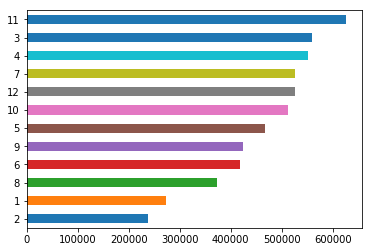

In [19]:
month.value_counts().sort_values().plot(kind = 'barh')

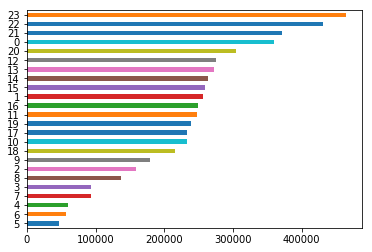

In [20]:
hour.value_counts().sort_values().plot(kind = 'barh')

# City訂單配送城市
以台灣而言，訂單配送城市以新北市最多，桃園縣最低。

In [21]:
Orders.groupby("City").size().sort_values(ascending=False)

City
新北市    1174232
台中市     799081
台北市     693837
桃園市     586934
高雄市     569046
台南市     398810
彰化縣     196922
新竹市     145389
新竹縣     127179
屏東縣     122380
苗栗縣     106055
基隆市      87806
雲林縣      86060
宜蘭縣      85122
南投縣      73099
花蓮縣      67688
嘉義縣      66482
嘉義市      53985
台東縣      34034
澎湖縣      19647
屏東市        764
台東市        418
桃園縣         92
1st         41
<fo         35
New         30
Nan         23
Tao         17
Tai          8
25           8
Quậ          6
Hy           6
Kao          5
Xin          5
Hsi          3
No.          3
Jia          3
Keb          2
Ins          2
Kot          2
Daf          2
Aya          2
Cha          1
Đại          1
dtype: int64

# District訂單配送區域
訂單配送區域以東區最多，桃園市最低。

In [22]:
Orders.groupby("District").size().sort_values(ascending=False)

District
東區       131963
板橋區      130199
北區       108723
中壢區      100956
中和區       96942
三重區       96006
新莊區       94304
桃園區       90034
中山區       85059
西屯區       78329
三民區       66608
新店區       64700
內湖區       62761
大安區       61046
永康區       60225
信義區       58840
北屯區       58133
南區        56414
汐止區       54726
西區        54458
土城區       52019
龜山區       50097
鳳山區       49982
士林區       49036
淡水區       48130
文山區       47561
蘆洲區       45341
中正區       43870
永和區       43837
平鎮區       42073
          ...  
阿里山鄉        203
三地門鄉        203
番路鄉         191
北門區         153
豐濱鄉         101
大埔鄉          95
大同鄉          72
達仁鄉          72
獅潭鄉          56
牡丹鄉          53
泰武鄉          52
南化區          44
峨眉鄉          34
田寮區          28
田中鎮站區        27
萬榮鄉          18
西嶼鄉          17
左鎮區          16
延平鄉          15
復興區          15
尖石鄉          13
龍崎區          11
泰安鄉          10
西湖鄉           9
來義鄉           8
茂林區           7
金峰鄉           5
海端鄉           4
八德市           4
桃園市           3
Length: 340, dt

# StoreName訂單配送超商名稱
明顯可以發現外島的超商特別熱門，其次則為校園中的超商。

In [23]:
Orders.groupby("StoreName").size().sort_values(ascending=False)

StoreName
全家澎湖鑫科店                   7169
全家板橋堂春店                   4260
全家澎湖海洋店                   3568
全家澎湖朝陽店                   3435
全家澎湖光復店                   3427
清大門市                      3427
全家永康新科店                   3418
全家興政店                     3209
靜大門市                      2755
新家專門市                     2714
嘉南門市                      2669
藍田門市                      2625
大潭門市                      2623
全家龜山德明店                   2572
中正大學門市                    2550
全家壽豐東華店                   2537
鹿鳴門市                      2509
全家永康南科大店                  2469
全家龜山庚勤店                   2436
育樂門市                      2435
全家大社翠屏店                   2387
全家新文大店                    2345
政大門市                      2345
耀明門市                      2295
東華門市                      2232
全家台中金南門店                  2207
鹿維門市                      2169
全家高雄東賢店                   2158
全家永康新南台店                  2131
全家仁德二仁店                   2123
                          ... 
日福門市                         

# DeliveryTypeDef訂單配送方式
以7-11最多，全家其次，少部分為配送到府

In [24]:
Orders.groupby("DeliverTypeDef").size().sort_values(ascending=False)

DeliverTypeDef
SevenEleven    2959135
Family         2037871
Home            498270
dtype: int64

# StatusDef訂單狀態
WaitingToShipping: 出貨中; Cancel: 取消單;CreditCheckFail: 信用卡付款失敗; Overdue: 未取貨;ReturnGoods: 退貨; Finish: 訂單成功

In [25]:
Orders.groupby("StatusDef").size().sort_values(ascending=False)

StatusDef
Finish               4185534
Cancel                749122
Overdue               293402
ReturnGoods           264761
CreditCheckFail         1598
WaitingToShipping        859
dtype: int64

# CauseDef退貨原因
最主要退貨的原因是「商品質感、品質不佳」，其次為「重複購買或不需要了」，而較少人是因為「價格比較貴」退貨

In [26]:
Orders.groupby("CauseDef").size().sort_values(ascending=False)

CauseDef
商品質感/品質不佳         74062
重複購買或不需要了         56907
規格不符、商品與網頁標示不清    55468
改買了別款或改付款方式       29909
尺寸不合              25266
商品有瑕疵或故障          14681
其他                10712
商品使用不如預期           7028
送貨速度太慢             6000
商品寄錯或缺件            1632
價格比較貴              1580
dtype: int64